CPU times: total: 3d 7h 43min 43s
Wall time: 9h 30min 18s

In [1]:
import pickle
import os
import datetime

In [2]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, scipy, time, warnings

import sys
from pathlib import Path

import sklearn
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score

from evaluation_framework.pipeline import EvaluationPipeline
from evaluation_framework import steps as ef_steps
from evaluation_framework.datasets import get_datasets_for_pattern
from evaluation_framework.runners import run_on_many_datasets

In [3]:
from methods.EF_PAPE import calculate_PAPE_on_chunk
from methods.EF_TEST_SET_performance import calculate_TEST_SET_performance_on_chunk
from methods.EF_ATC import calculate_ATC_on_chunk
from methods.EF_DOC import calculate_DOC_on_chunk
from methods.EF_ImportanceWeighting import calculate_IW_on_chunk
from methods.EF_RT import calculate_RT_on_chunk
from methods.EF_CBPE import calculate_CBPE_on_chunk

from methods.utils import calculate_targets, save_results_to_df

In [4]:
import warnings 
warnings.filterwarnings('ignore')

In [5]:
# File folder with results, results will be stored here and loaded from there
results_files_folder = 'sample_size_experiment_results'
if not os.path.exists(results_files_folder):
    os.makedirs(results_files_folder)

In [6]:
selected_dataset = get_datasets_for_pattern(pattern="employment-2015_2016_2017_2018-CA", data_dir="datasets")

In [7]:
chunksizes = np.asarray([100,  200,  500, 1000, 2000, 5000])
steps = (np.ones(len(chunksizes))*1000).astype(int)

from copy import deepcopy

datasets = []
for chunksize, step in zip(chunksizes, steps):
    new_dataset = deepcopy(selected_dataset[0])
    new_dataset.observations_in_chunk = chunksize
    new_dataset.step_size = step
    datasets.append(new_dataset)

In [8]:
len(datasets)

6

# EF Functions

In [9]:
methods = [
    "PAPE", 
    "TEST_SET",
    "ATC",
    "DOC",
    "IW",
    "CBPE",
    'RT']

In [10]:
monitored_models = [
    'LGBMClassifier_',
]

In [11]:
experiments = []

for method in methods:
    for monitored_model in monitored_models:
            experiments.append({
                'method':method,
                'monitored_model': monitored_model,
            })

In [12]:
experiments

[{'method': 'PAPE', 'monitored_model': 'LGBMClassifier_'},
 {'method': 'TEST_SET', 'monitored_model': 'LGBMClassifier_'},
 {'method': 'ATC', 'monitored_model': 'LGBMClassifier_'},
 {'method': 'DOC', 'monitored_model': 'LGBMClassifier_'},
 {'method': 'IW', 'monitored_model': 'LGBMClassifier_'},
 {'method': 'CBPE', 'monitored_model': 'LGBMClassifier_'},
 {'method': 'RT', 'monitored_model': 'LGBMClassifier_'}]

In [13]:
len(experiments)

7

In [14]:
len(datasets)

6

experiment 0 out of 7
PROGRESS: 0.0
PAPE LGBMClassifier_

Evaluating on: datasets\employment-2015_2016_2017_2018-CA.pq
Chunk size: 100, all chunks: 1133, reference_chunks: 376, transition chunks: 1, production_chunks (includes transition) :757
plotting387466902166


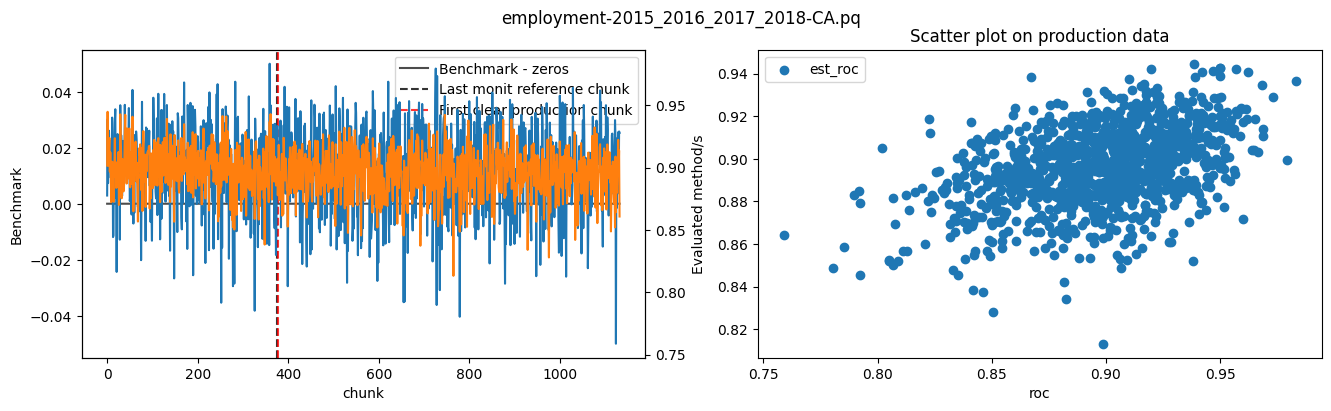

PROGRESS: 0.023809523809523808
PAPE LGBMClassifier_

Evaluating on: datasets\employment-2015_2016_2017_2018-CA.pq
Chunk size: 200, all chunks: 1133, reference_chunks: 376, transition chunks: 1, production_chunks (includes transition) :757
plotting387466902166


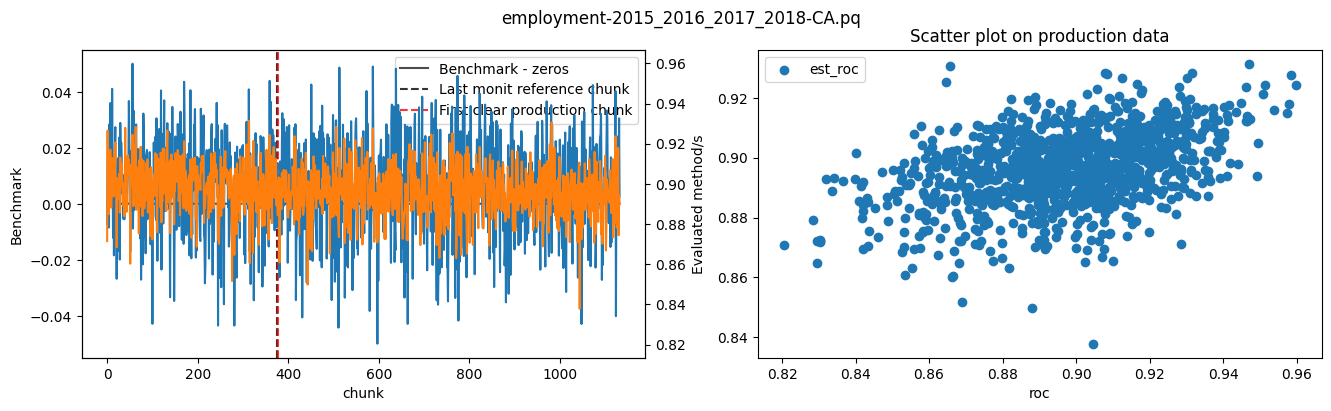

PROGRESS: 0.047619047619047616
PAPE LGBMClassifier_

Evaluating on: datasets\employment-2015_2016_2017_2018-CA.pq
Chunk size: 500, all chunks: 1132, reference_chunks: 376, transition chunks: 1, production_chunks (includes transition) :756
plotting6077738516755


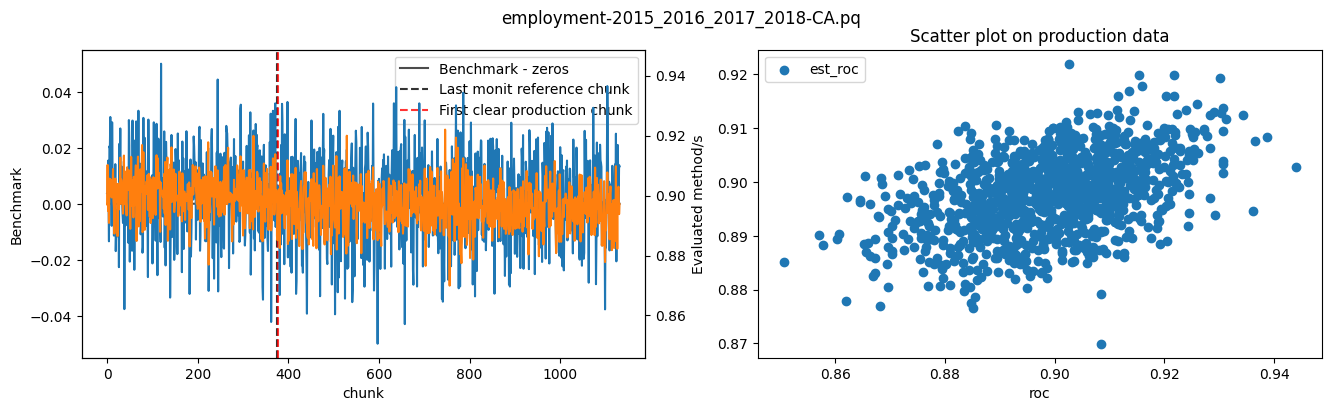

PROGRESS: 0.07142857142857142
PAPE LGBMClassifier_

Evaluating on: datasets\employment-2015_2016_2017_2018-CA.pq
Chunk size: 1000, all chunks: 1132, reference_chunks: 376, transition chunks: 1, production_chunks (includes transition) :756
plotting6077738516755


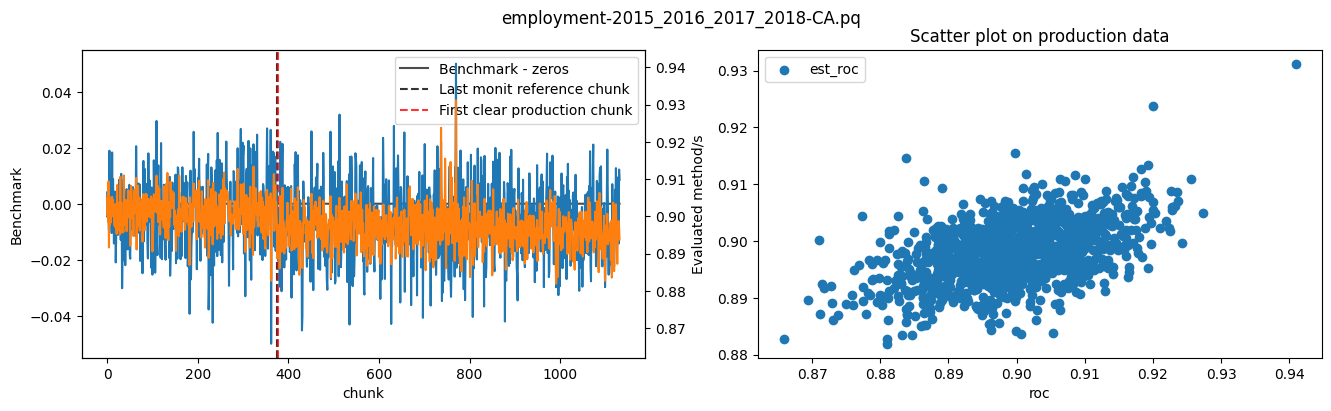

PROGRESS: 0.09523809523809523
PAPE LGBMClassifier_

Evaluating on: datasets\employment-2015_2016_2017_2018-CA.pq
Chunk size: 2000, all chunks: 1131, reference_chunks: 375, transition chunks: 2, production_chunks (includes transition) :756
plotting8267020336655


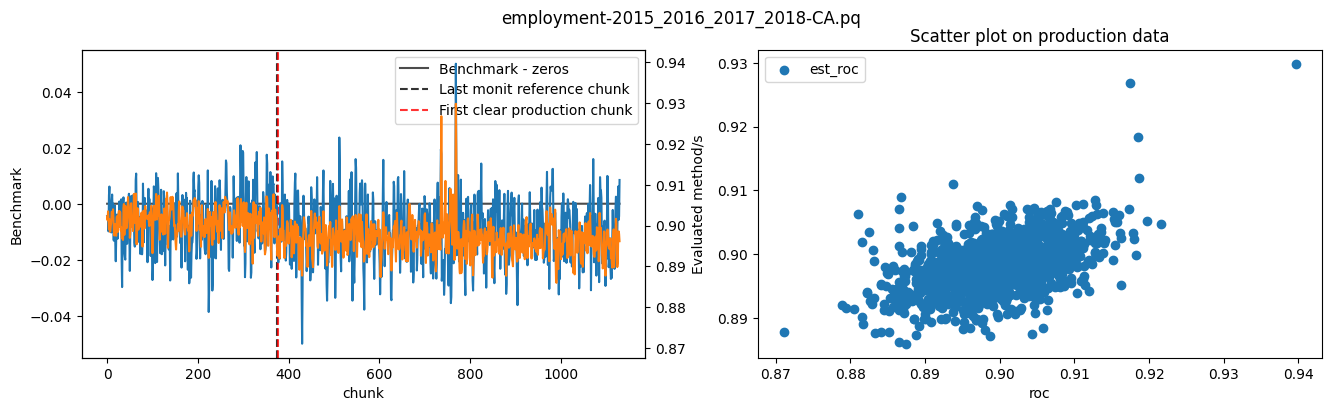

PROGRESS: 0.11904761904761905
PAPE LGBMClassifier_

Evaluating on: datasets\employment-2015_2016_2017_2018-CA.pq
Chunk size: 5000, all chunks: 1128, reference_chunks: 372, transition chunks: 5, production_chunks (includes transition) :756
plotting4751773059555


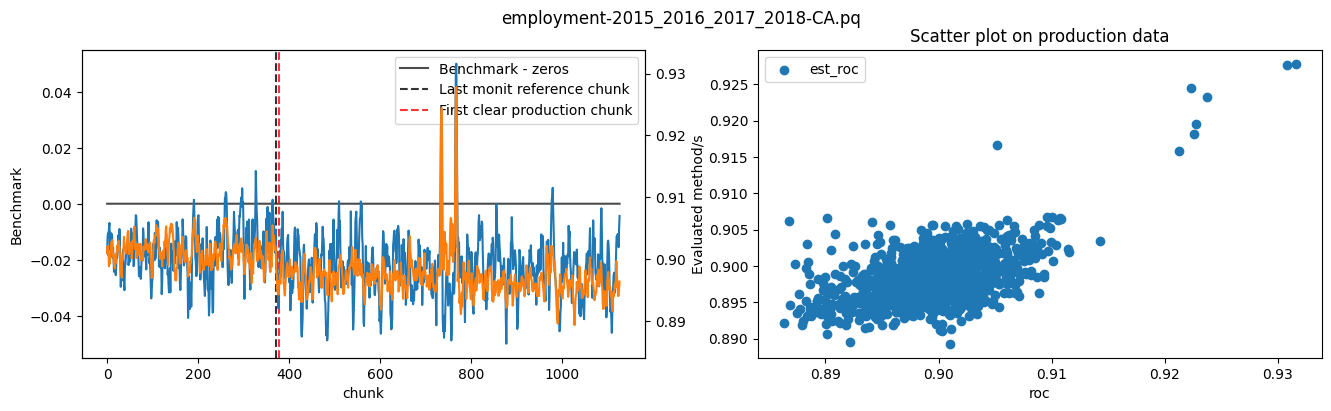

experiment 1 out of 7
PROGRESS: 0.14285714285714285
TEST_SET LGBMClassifier_

Evaluating on: datasets\employment-2015_2016_2017_2018-CA.pq
Chunk size: 100, all chunks: 1133, reference_chunks: 376, transition chunks: 1, production_chunks (includes transition) :757
EVALUTING FOR:
LGBMClassifier_
plotting387466902166


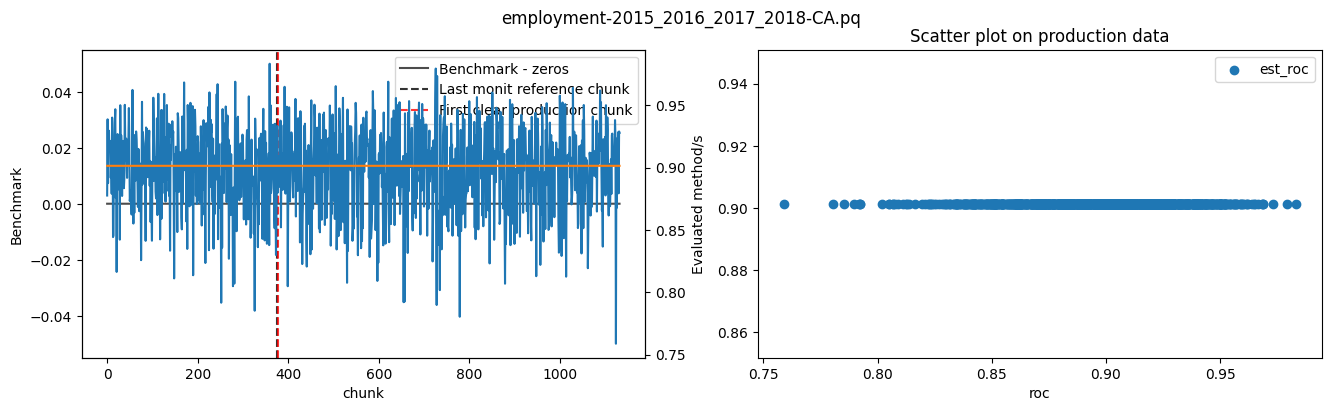

PROGRESS: 0.16666666666666666
TEST_SET LGBMClassifier_

Evaluating on: datasets\employment-2015_2016_2017_2018-CA.pq
Chunk size: 200, all chunks: 1133, reference_chunks: 376, transition chunks: 1, production_chunks (includes transition) :757
EVALUTING FOR:
LGBMClassifier_
plotting387466902166


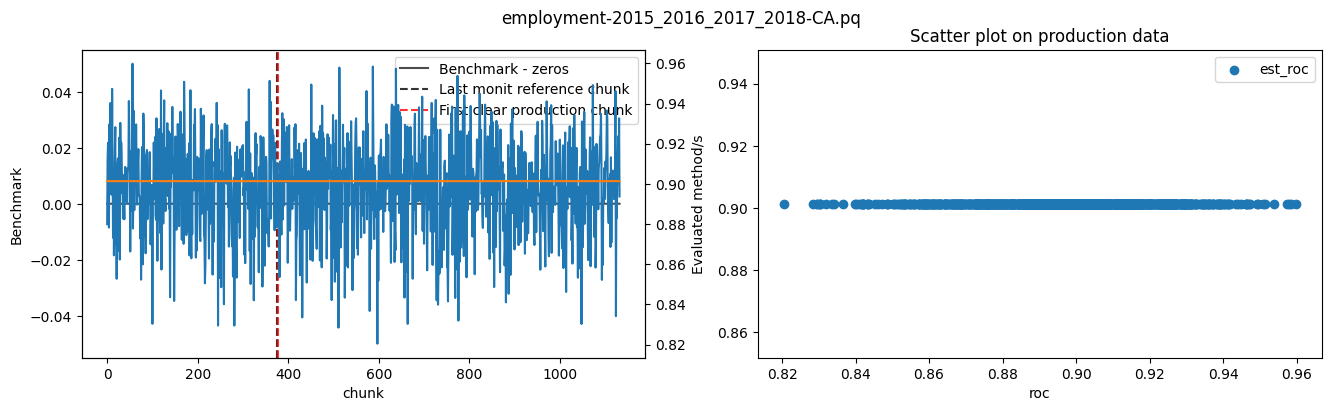

PROGRESS: 0.19047619047619047
TEST_SET LGBMClassifier_

Evaluating on: datasets\employment-2015_2016_2017_2018-CA.pq
Chunk size: 500, all chunks: 1132, reference_chunks: 376, transition chunks: 1, production_chunks (includes transition) :756
EVALUTING FOR:
LGBMClassifier_
plotting6077738516755


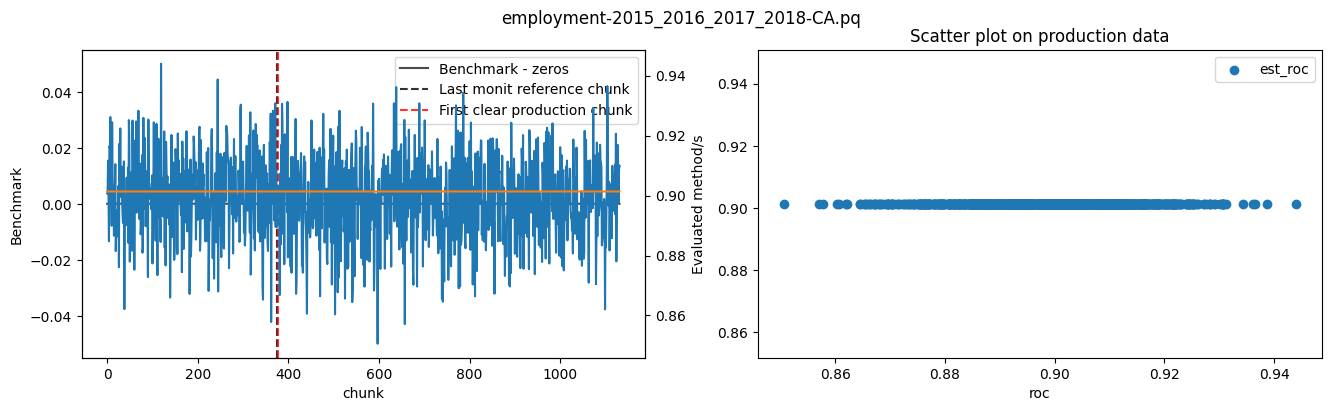

PROGRESS: 0.2142857142857143
TEST_SET LGBMClassifier_

Evaluating on: datasets\employment-2015_2016_2017_2018-CA.pq
Chunk size: 1000, all chunks: 1132, reference_chunks: 376, transition chunks: 1, production_chunks (includes transition) :756
EVALUTING FOR:
LGBMClassifier_
plotting6077738516755


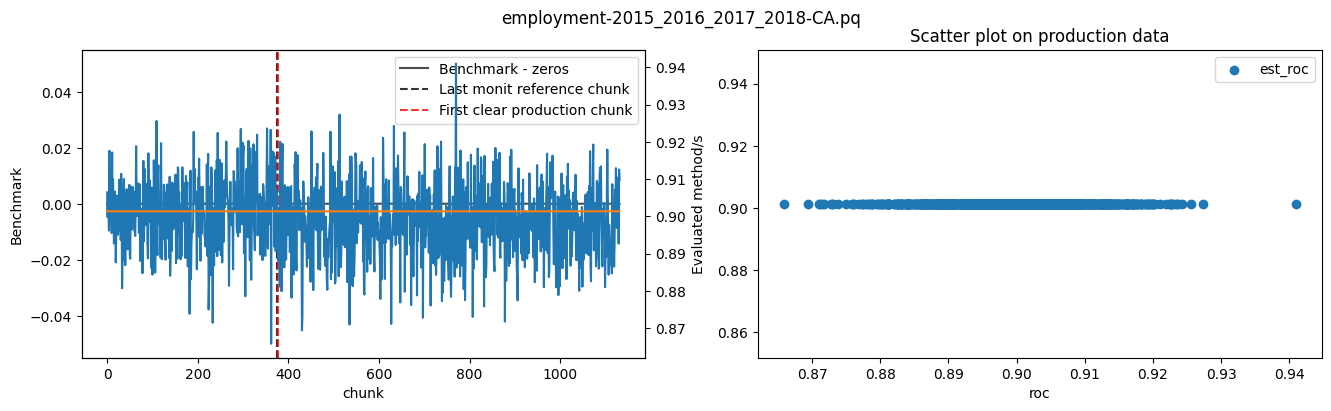

PROGRESS: 0.2380952380952381
TEST_SET LGBMClassifier_

Evaluating on: datasets\employment-2015_2016_2017_2018-CA.pq
Chunk size: 2000, all chunks: 1131, reference_chunks: 375, transition chunks: 2, production_chunks (includes transition) :756
EVALUTING FOR:
LGBMClassifier_
plotting8267020336655


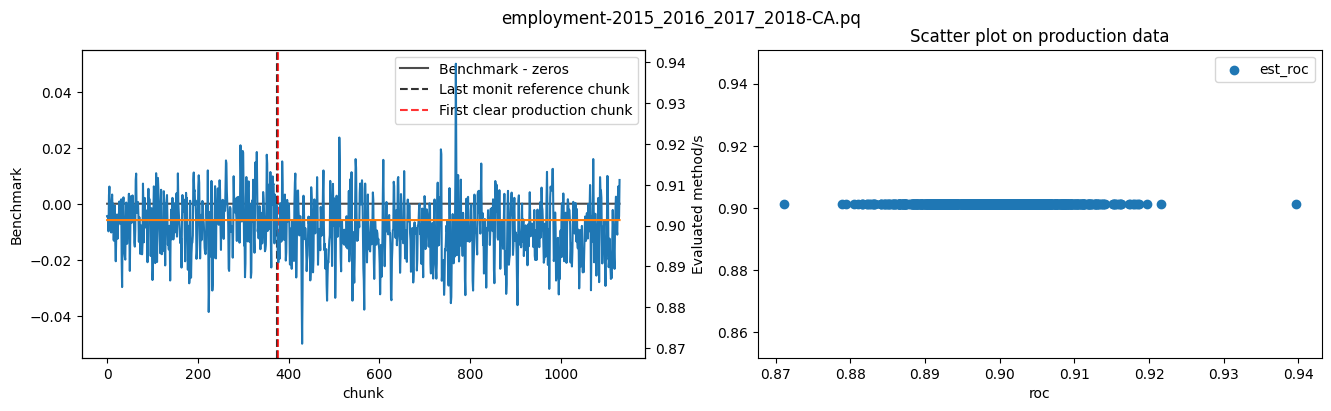

PROGRESS: 0.2619047619047619
TEST_SET LGBMClassifier_

Evaluating on: datasets\employment-2015_2016_2017_2018-CA.pq
Chunk size: 5000, all chunks: 1128, reference_chunks: 372, transition chunks: 5, production_chunks (includes transition) :756
EVALUTING FOR:
LGBMClassifier_
plotting4751773059555


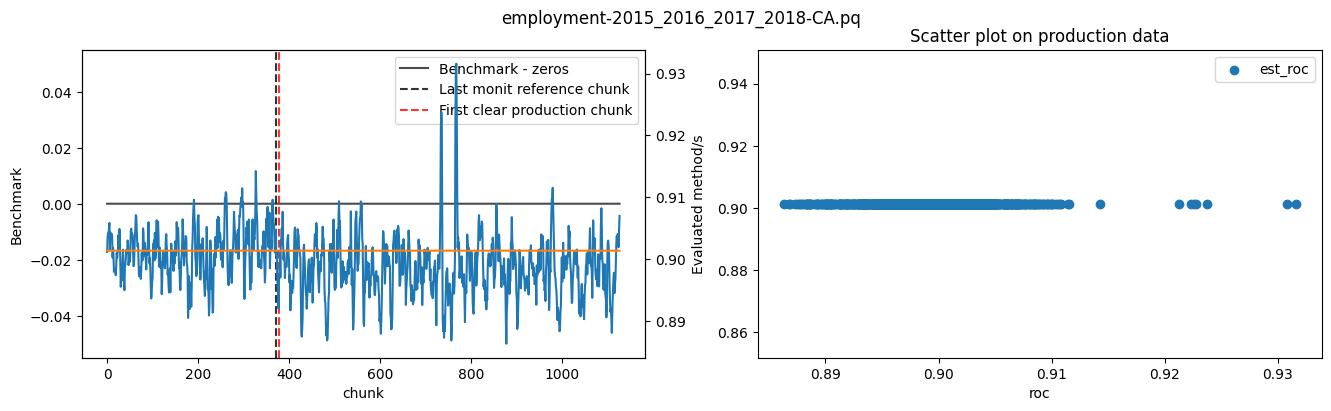

experiment 2 out of 7
PROGRESS: 0.2857142857142857
ATC LGBMClassifier_

Evaluating on: datasets\employment-2015_2016_2017_2018-CA.pq
Chunk size: 100, all chunks: 1133, reference_chunks: 376, transition chunks: 1, production_chunks (includes transition) :757
plotting387466902166


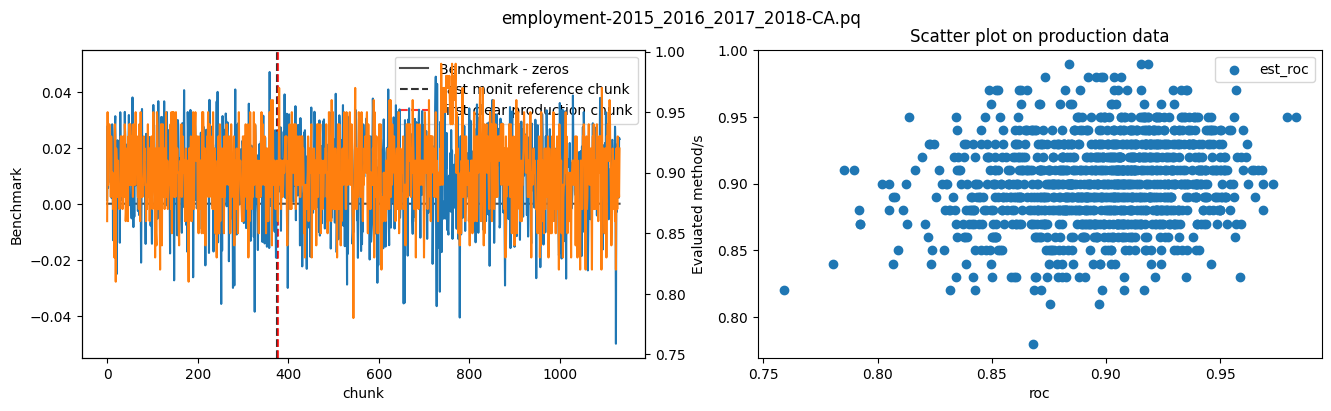

PROGRESS: 0.30952380952380953
ATC LGBMClassifier_

Evaluating on: datasets\employment-2015_2016_2017_2018-CA.pq
Chunk size: 200, all chunks: 1133, reference_chunks: 376, transition chunks: 1, production_chunks (includes transition) :757
plotting387466902166


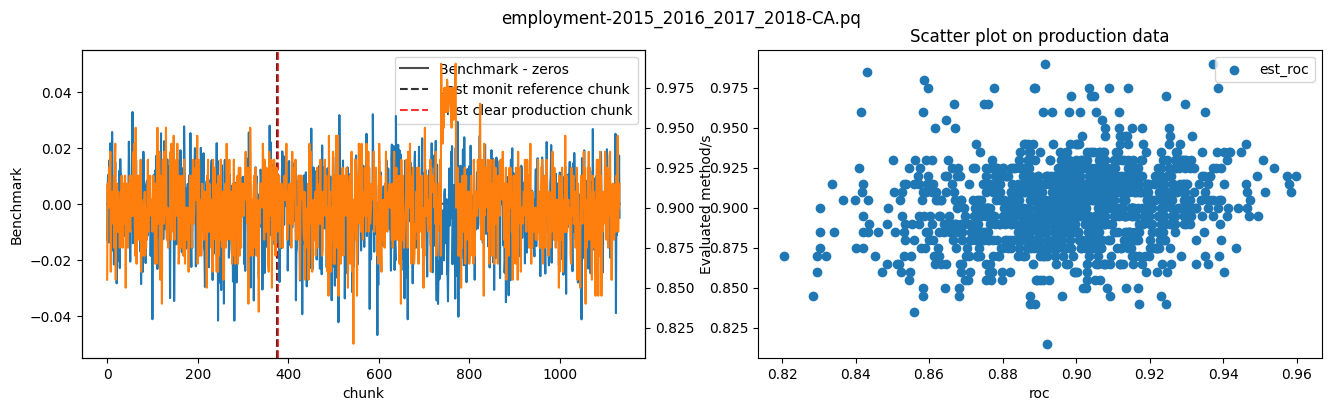

PROGRESS: 0.3333333333333333
ATC LGBMClassifier_

Evaluating on: datasets\employment-2015_2016_2017_2018-CA.pq
Chunk size: 500, all chunks: 1132, reference_chunks: 376, transition chunks: 1, production_chunks (includes transition) :756
plotting6077738516755


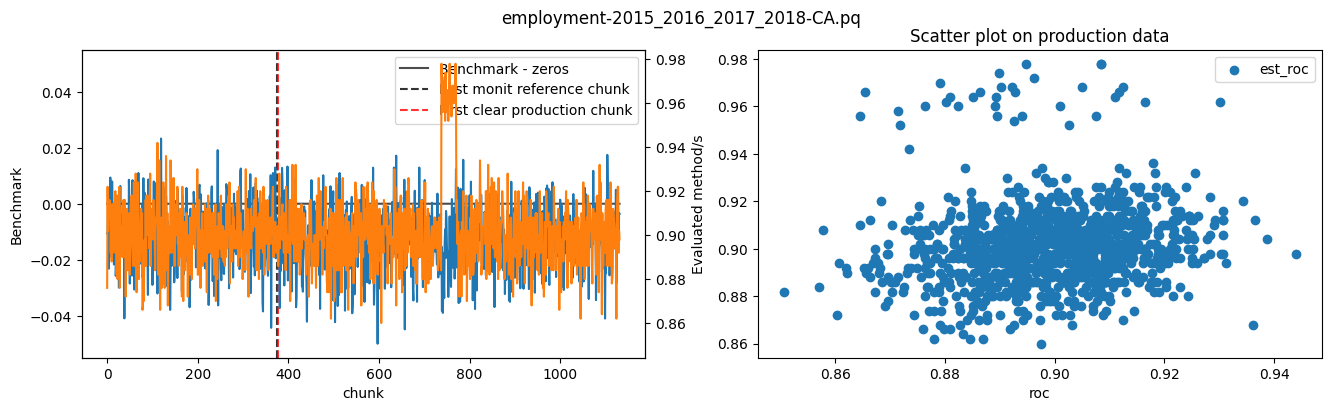

PROGRESS: 0.35714285714285715
ATC LGBMClassifier_

Evaluating on: datasets\employment-2015_2016_2017_2018-CA.pq
Chunk size: 1000, all chunks: 1132, reference_chunks: 376, transition chunks: 1, production_chunks (includes transition) :756
plotting6077738516755


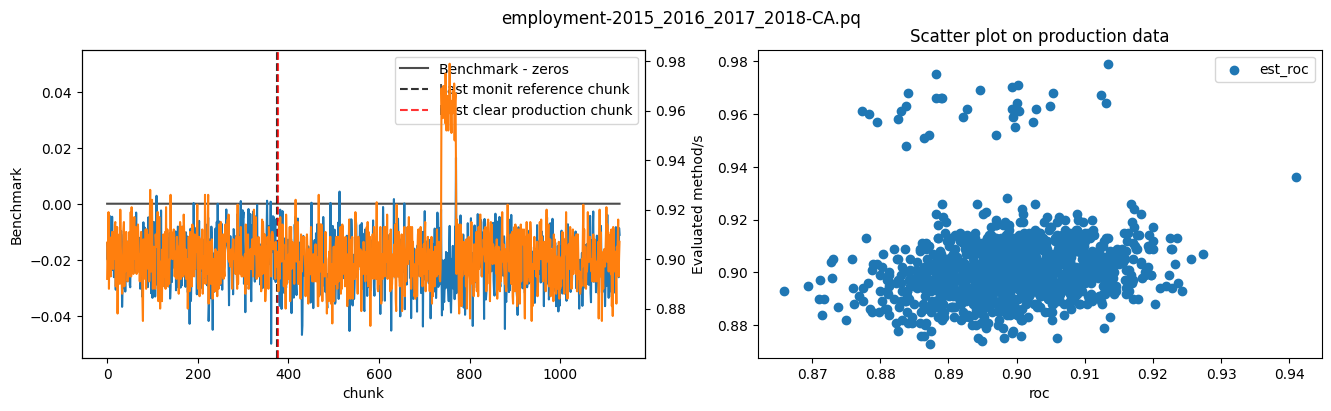

PROGRESS: 0.38095238095238093
ATC LGBMClassifier_

Evaluating on: datasets\employment-2015_2016_2017_2018-CA.pq
Chunk size: 2000, all chunks: 1131, reference_chunks: 375, transition chunks: 2, production_chunks (includes transition) :756
plotting8267020336655


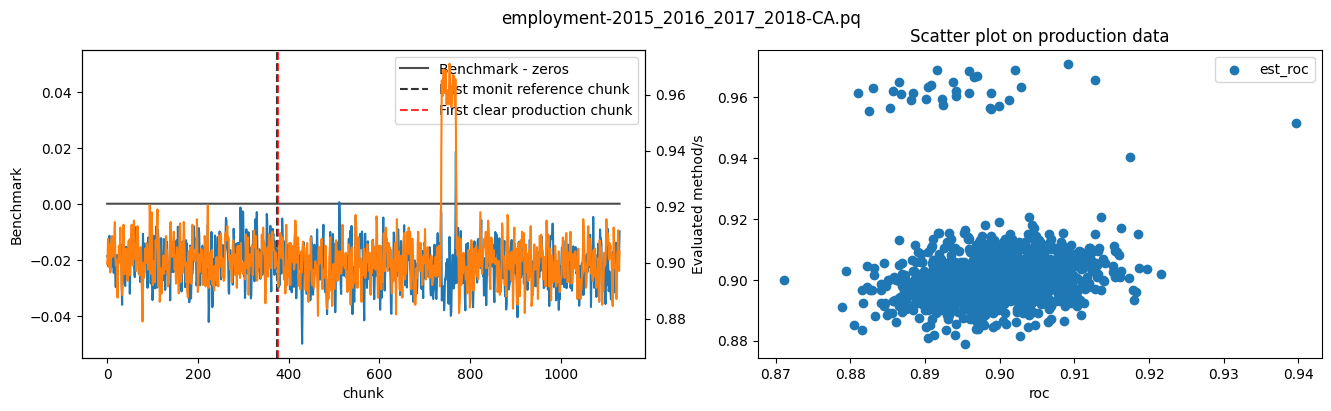

PROGRESS: 0.4047619047619047
ATC LGBMClassifier_

Evaluating on: datasets\employment-2015_2016_2017_2018-CA.pq
Chunk size: 5000, all chunks: 1128, reference_chunks: 372, transition chunks: 5, production_chunks (includes transition) :756
plotting4751773059555


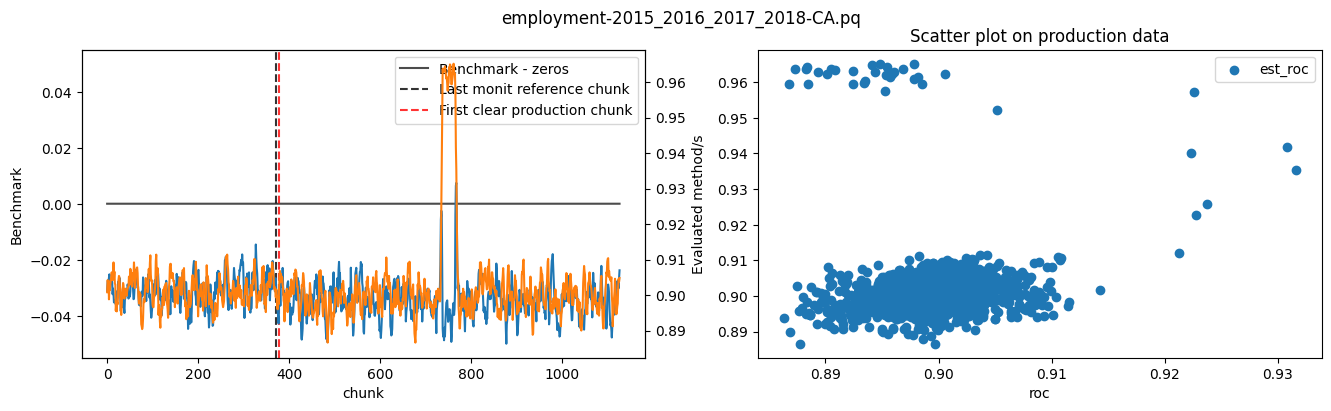

experiment 3 out of 7
PROGRESS: 0.4285714285714286
DOC LGBMClassifier_

Evaluating on: datasets\employment-2015_2016_2017_2018-CA.pq
Chunk size: 100, all chunks: 1133, reference_chunks: 376, transition chunks: 1, production_chunks (includes transition) :757
plotting387466902166


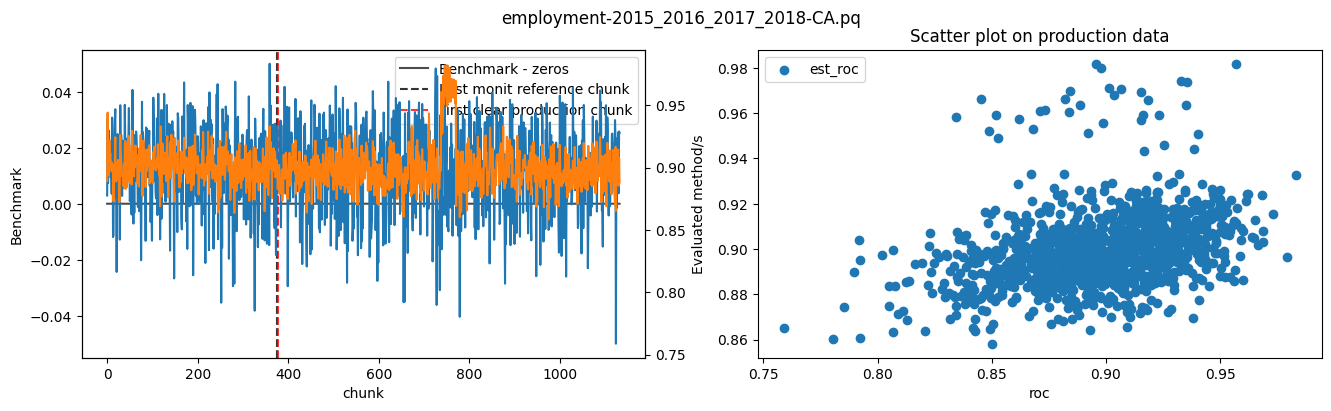

PROGRESS: 0.4523809523809524
DOC LGBMClassifier_

Evaluating on: datasets\employment-2015_2016_2017_2018-CA.pq
Chunk size: 200, all chunks: 1133, reference_chunks: 376, transition chunks: 1, production_chunks (includes transition) :757
plotting387466902166


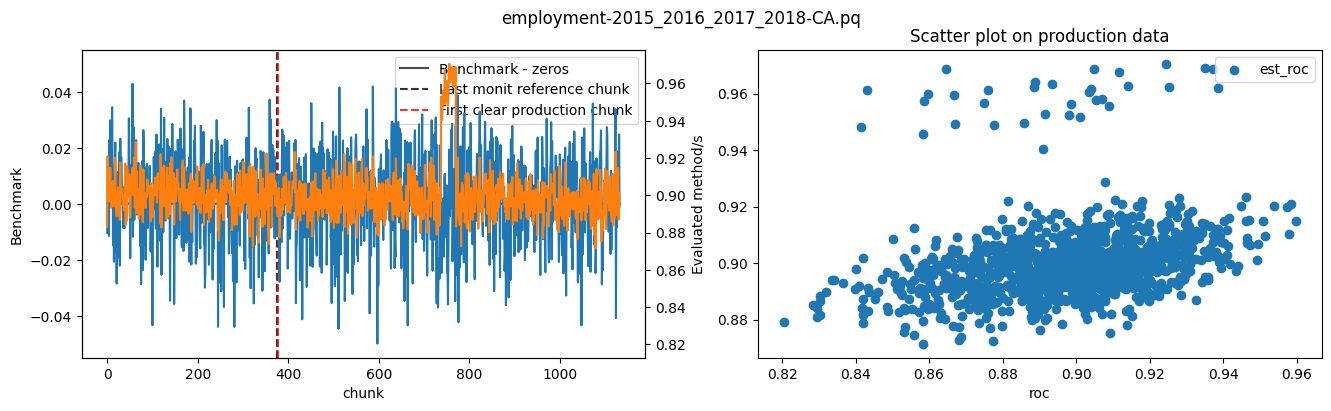

PROGRESS: 0.4761904761904762
DOC LGBMClassifier_

Evaluating on: datasets\employment-2015_2016_2017_2018-CA.pq
Chunk size: 500, all chunks: 1132, reference_chunks: 376, transition chunks: 1, production_chunks (includes transition) :756
plotting6077738516755


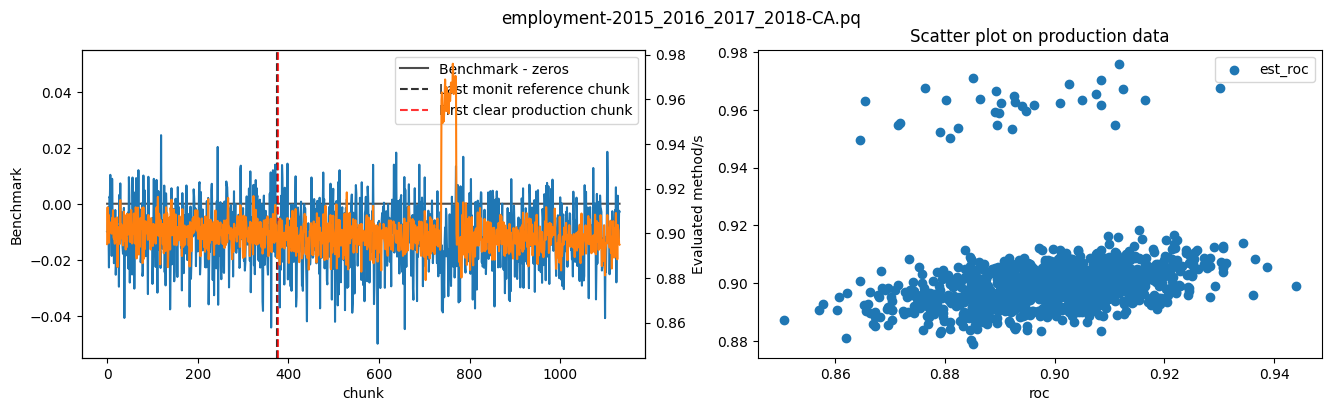

PROGRESS: 0.5
DOC LGBMClassifier_

Evaluating on: datasets\employment-2015_2016_2017_2018-CA.pq
Chunk size: 1000, all chunks: 1132, reference_chunks: 376, transition chunks: 1, production_chunks (includes transition) :756
plotting6077738516755


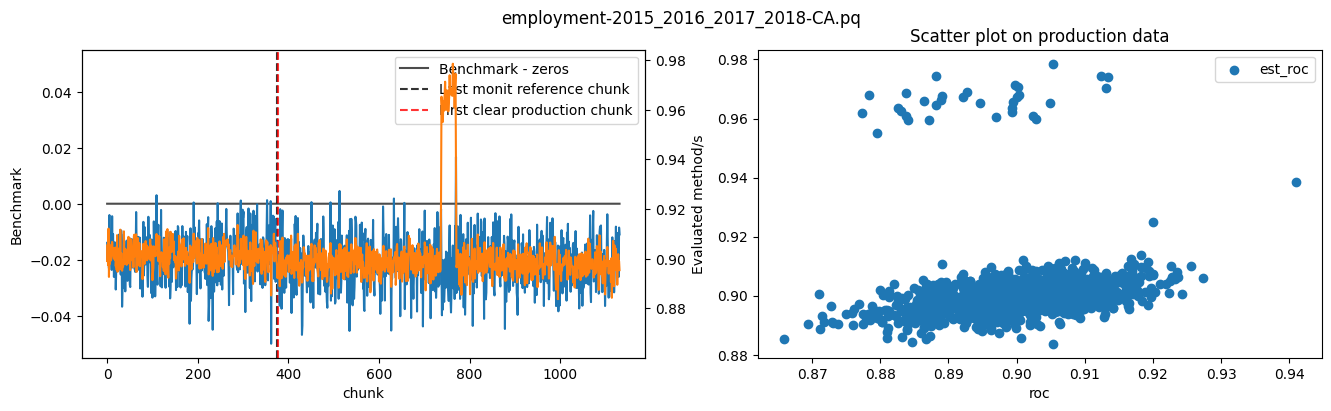

PROGRESS: 0.5238095238095238
DOC LGBMClassifier_

Evaluating on: datasets\employment-2015_2016_2017_2018-CA.pq
Chunk size: 2000, all chunks: 1131, reference_chunks: 375, transition chunks: 2, production_chunks (includes transition) :756
plotting8267020336655


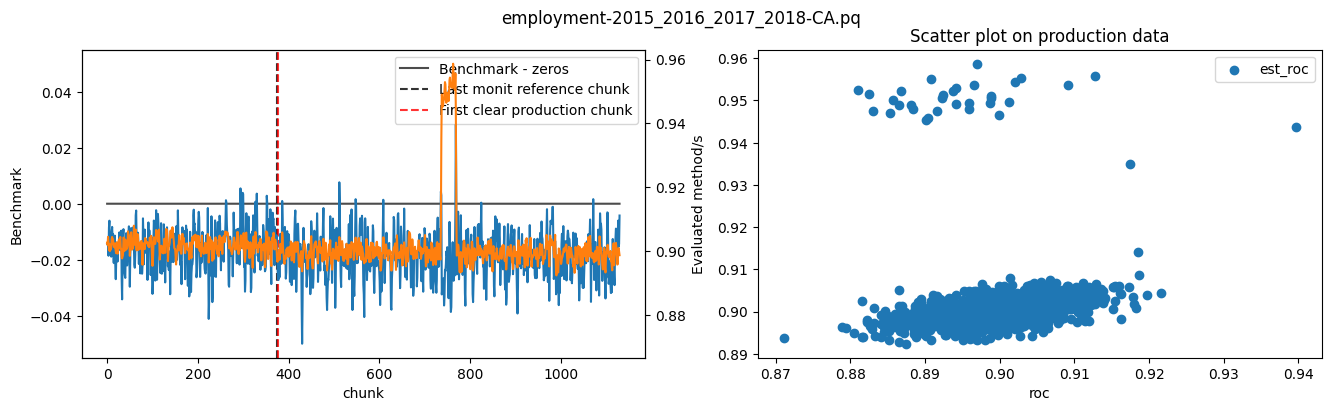

PROGRESS: 0.5476190476190476
DOC LGBMClassifier_

Evaluating on: datasets\employment-2015_2016_2017_2018-CA.pq
Chunk size: 5000, all chunks: 1128, reference_chunks: 372, transition chunks: 5, production_chunks (includes transition) :756
plotting4751773059555


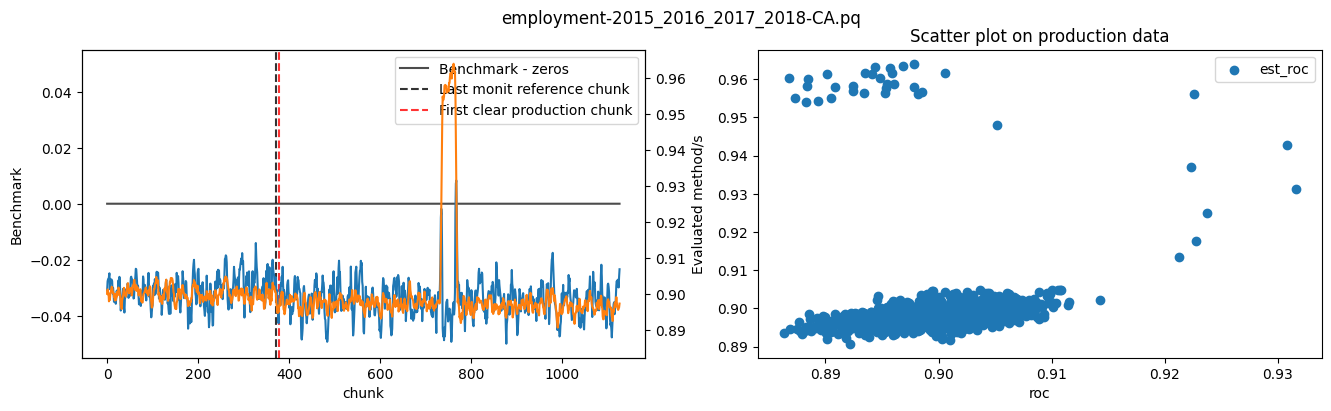

experiment 4 out of 7
PROGRESS: 0.5714285714285714
IW LGBMClassifier_

Evaluating on: datasets\employment-2015_2016_2017_2018-CA.pq
Chunk size: 100, all chunks: 1133, reference_chunks: 376, transition chunks: 1, production_chunks (includes transition) :757
plotting387466902166


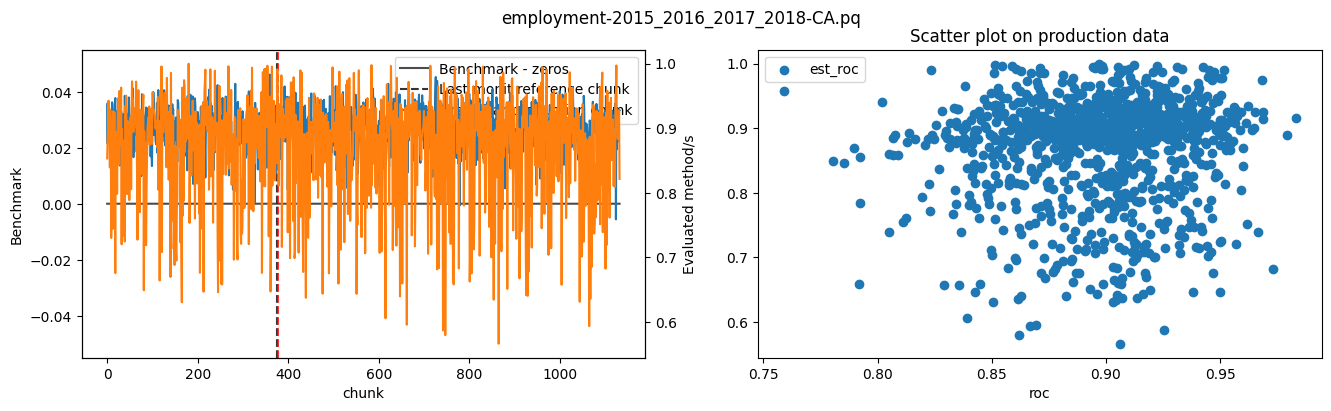

PROGRESS: 0.5952380952380952
IW LGBMClassifier_

Evaluating on: datasets\employment-2015_2016_2017_2018-CA.pq
Chunk size: 200, all chunks: 1133, reference_chunks: 376, transition chunks: 1, production_chunks (includes transition) :757
plotting387466902166


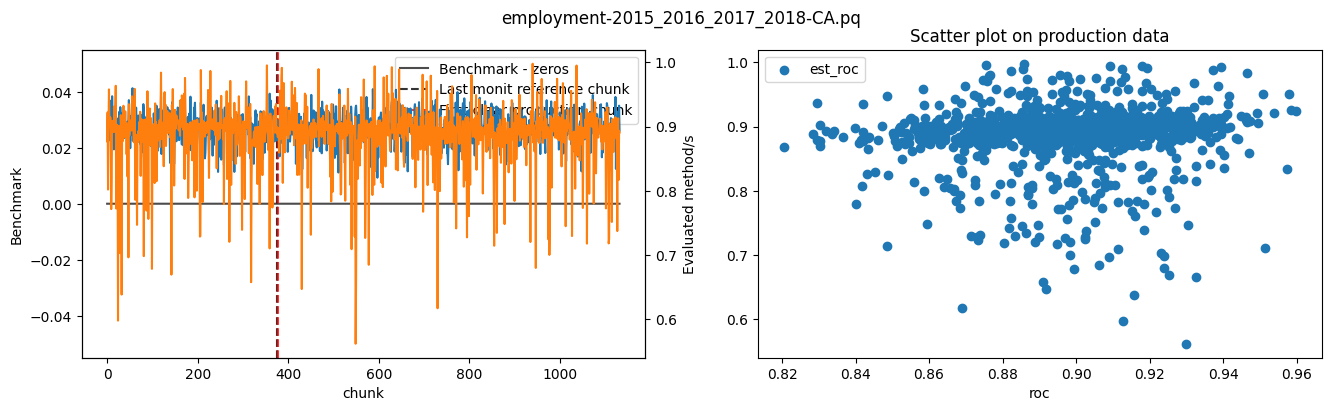

PROGRESS: 0.6190476190476191
IW LGBMClassifier_

Evaluating on: datasets\employment-2015_2016_2017_2018-CA.pq
Chunk size: 500, all chunks: 1132, reference_chunks: 376, transition chunks: 1, production_chunks (includes transition) :756
plotting6077738516755


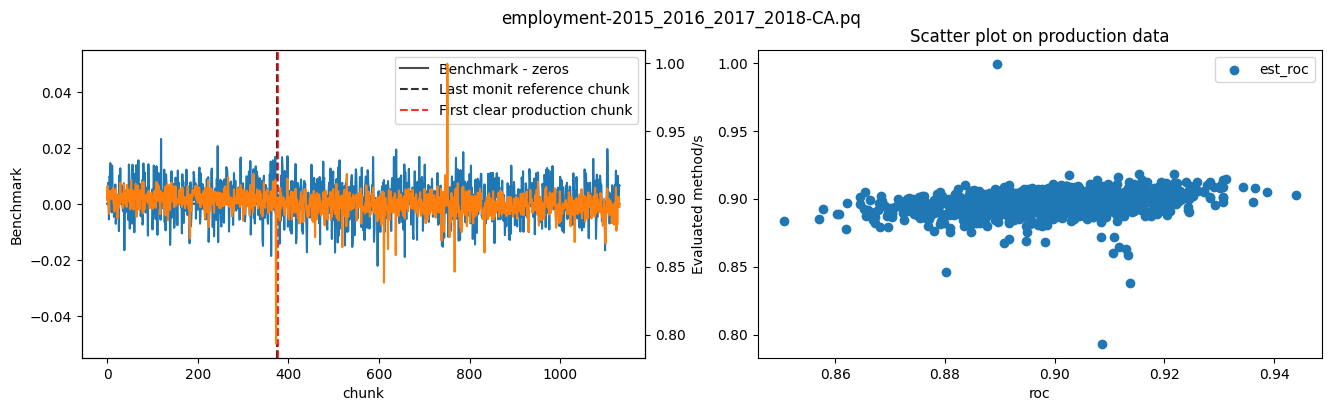

PROGRESS: 0.6428571428571429
IW LGBMClassifier_

Evaluating on: datasets\employment-2015_2016_2017_2018-CA.pq
Chunk size: 1000, all chunks: 1132, reference_chunks: 376, transition chunks: 1, production_chunks (includes transition) :756
plotting6077738516755


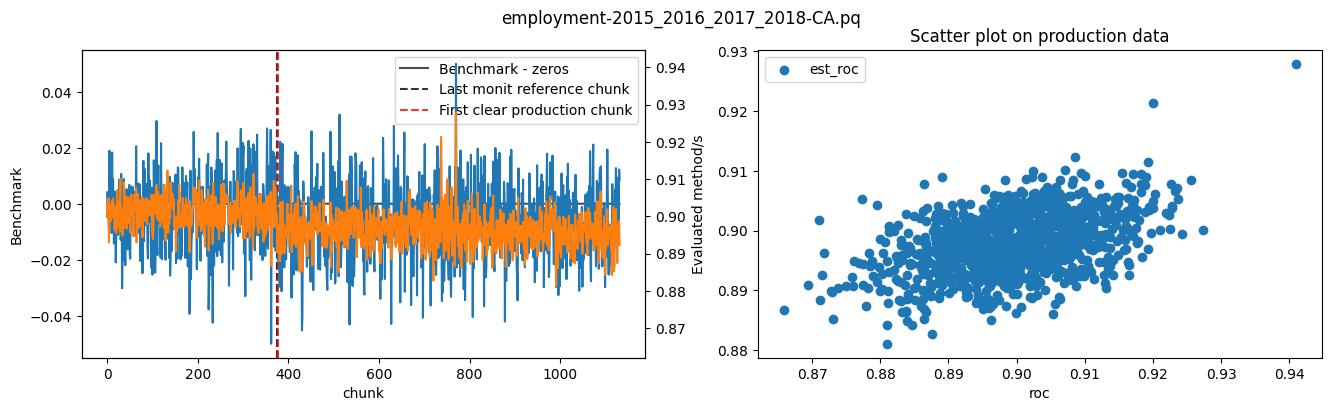

PROGRESS: 0.6666666666666666
IW LGBMClassifier_

Evaluating on: datasets\employment-2015_2016_2017_2018-CA.pq
Chunk size: 2000, all chunks: 1131, reference_chunks: 375, transition chunks: 2, production_chunks (includes transition) :756
plotting8267020336655


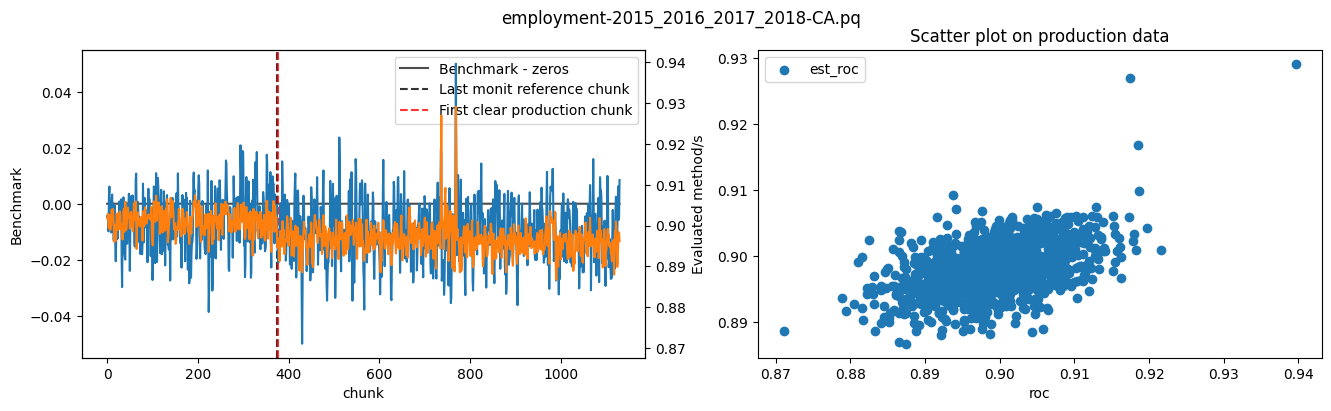

PROGRESS: 0.6904761904761906
IW LGBMClassifier_

Evaluating on: datasets\employment-2015_2016_2017_2018-CA.pq
Chunk size: 5000, all chunks: 1128, reference_chunks: 372, transition chunks: 5, production_chunks (includes transition) :756
plotting4751773059555


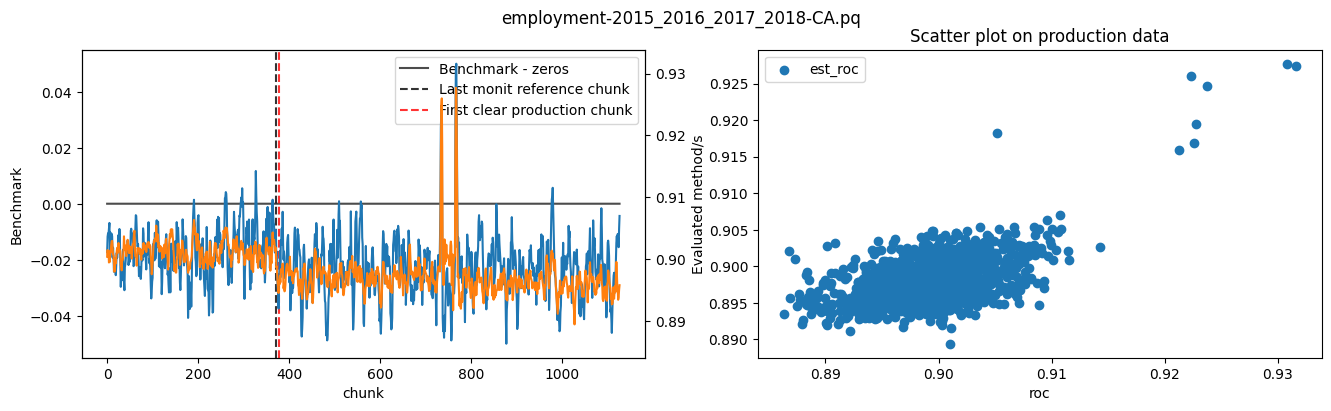

experiment 5 out of 7
PROGRESS: 0.7142857142857143
CBPE LGBMClassifier_

Evaluating on: datasets\employment-2015_2016_2017_2018-CA.pq
Chunk size: 100, all chunks: 1133, reference_chunks: 376, transition chunks: 1, production_chunks (includes transition) :757
plotting387466902166


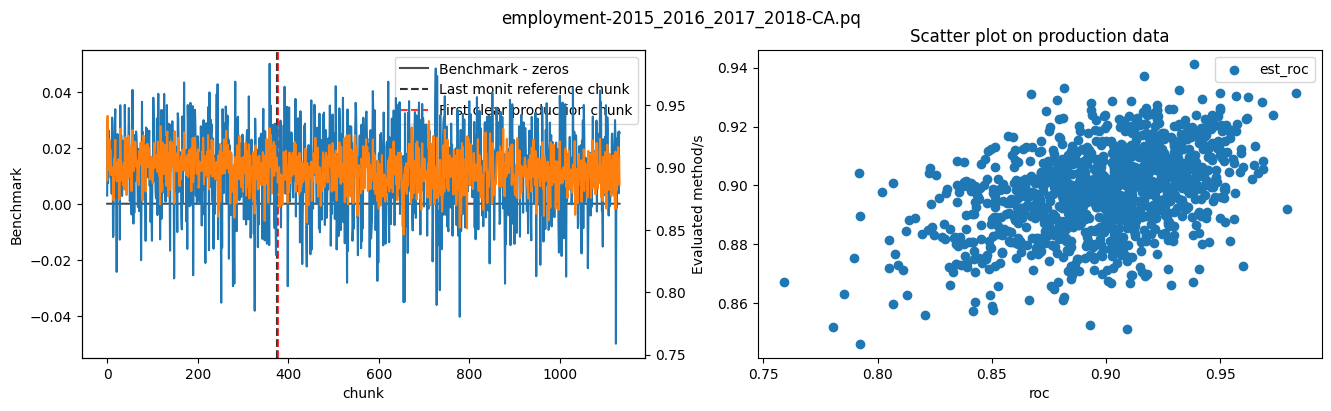

PROGRESS: 0.7380952380952381
CBPE LGBMClassifier_

Evaluating on: datasets\employment-2015_2016_2017_2018-CA.pq
Chunk size: 200, all chunks: 1133, reference_chunks: 376, transition chunks: 1, production_chunks (includes transition) :757
plotting387466902166


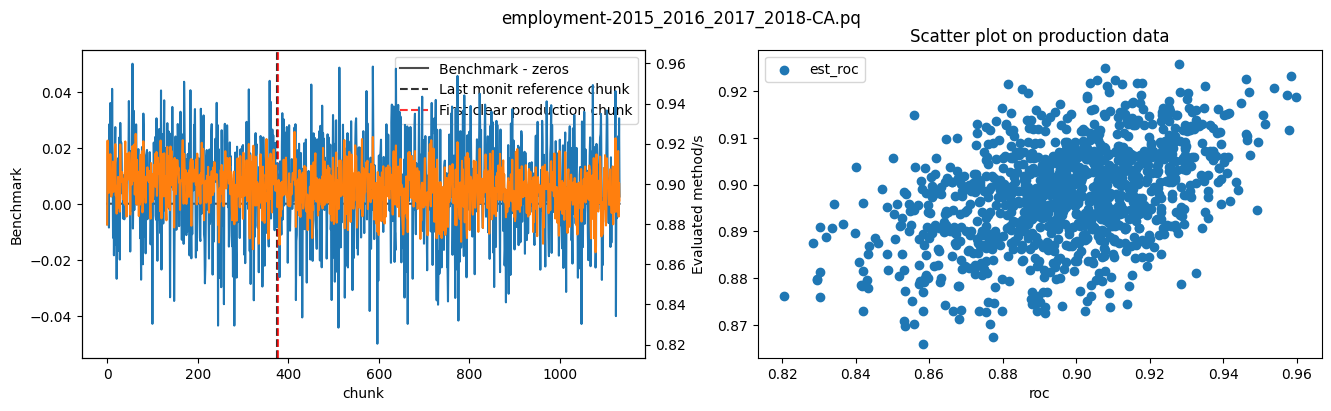

PROGRESS: 0.7619047619047619
CBPE LGBMClassifier_

Evaluating on: datasets\employment-2015_2016_2017_2018-CA.pq
Chunk size: 500, all chunks: 1132, reference_chunks: 376, transition chunks: 1, production_chunks (includes transition) :756
plotting6077738516755


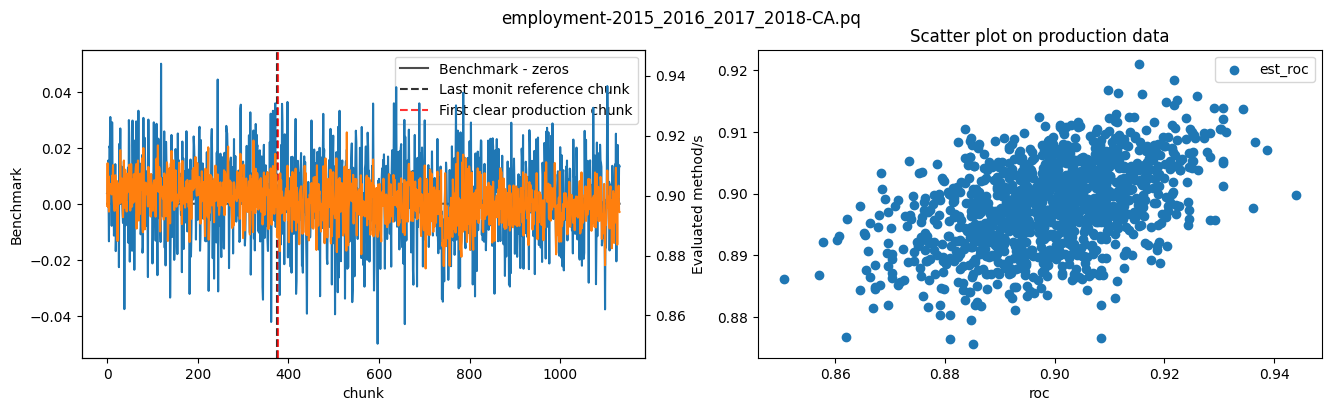

PROGRESS: 0.7857142857142857
CBPE LGBMClassifier_

Evaluating on: datasets\employment-2015_2016_2017_2018-CA.pq
Chunk size: 1000, all chunks: 1132, reference_chunks: 376, transition chunks: 1, production_chunks (includes transition) :756
plotting6077738516755


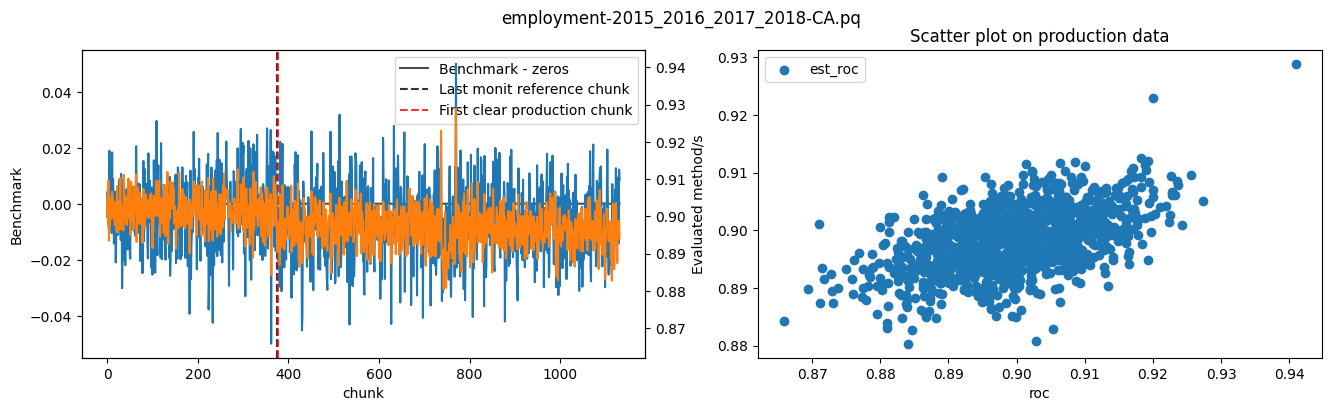

PROGRESS: 0.8095238095238094
CBPE LGBMClassifier_

Evaluating on: datasets\employment-2015_2016_2017_2018-CA.pq
Chunk size: 2000, all chunks: 1131, reference_chunks: 375, transition chunks: 2, production_chunks (includes transition) :756
plotting8267020336655


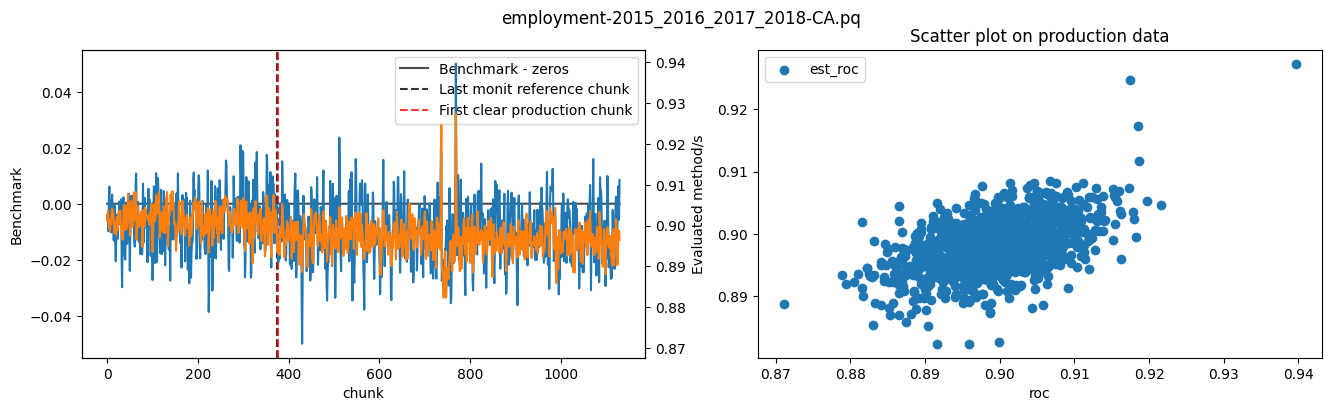

PROGRESS: 0.8333333333333334
CBPE LGBMClassifier_

Evaluating on: datasets\employment-2015_2016_2017_2018-CA.pq
Chunk size: 5000, all chunks: 1128, reference_chunks: 372, transition chunks: 5, production_chunks (includes transition) :756
plotting4751773059555


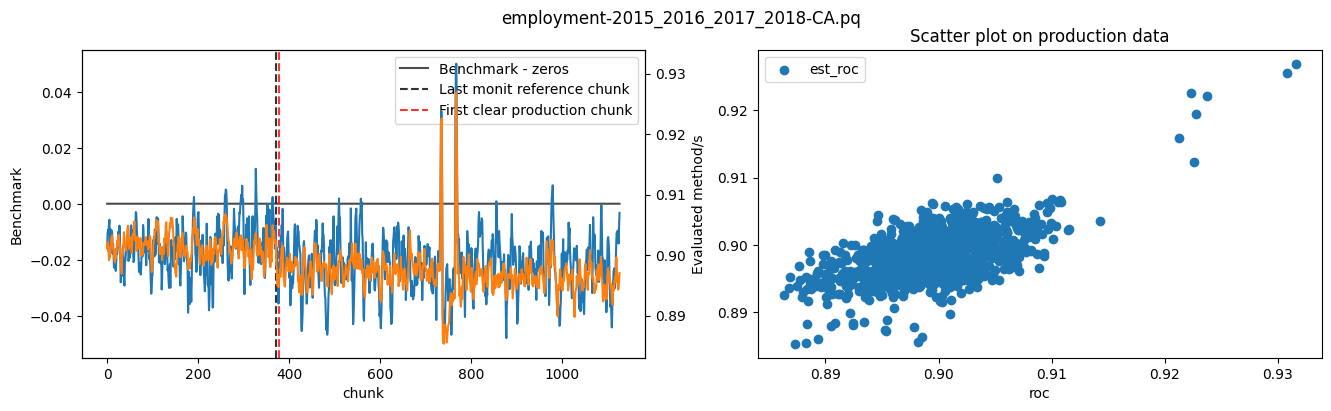

experiment 6 out of 7
PROGRESS: 0.8571428571428572
RT LGBMClassifier_

Evaluating on: datasets\employment-2015_2016_2017_2018-CA.pq
Chunk size: 100, all chunks: 1133, reference_chunks: 376, transition chunks: 1, production_chunks (includes transition) :757
plotting387466902166


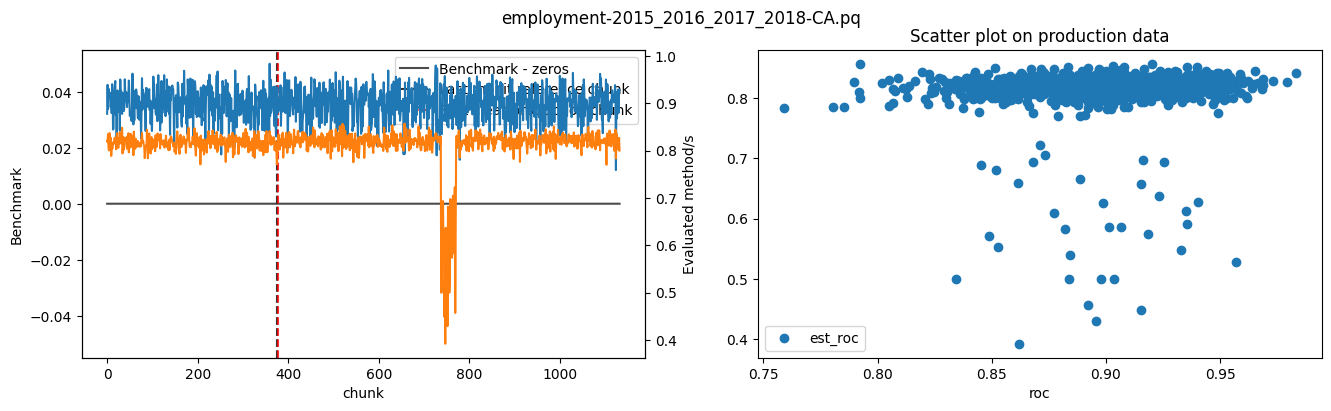

PROGRESS: 0.8809523809523809
RT LGBMClassifier_

Evaluating on: datasets\employment-2015_2016_2017_2018-CA.pq
Chunk size: 200, all chunks: 1133, reference_chunks: 376, transition chunks: 1, production_chunks (includes transition) :757
plotting387466902166


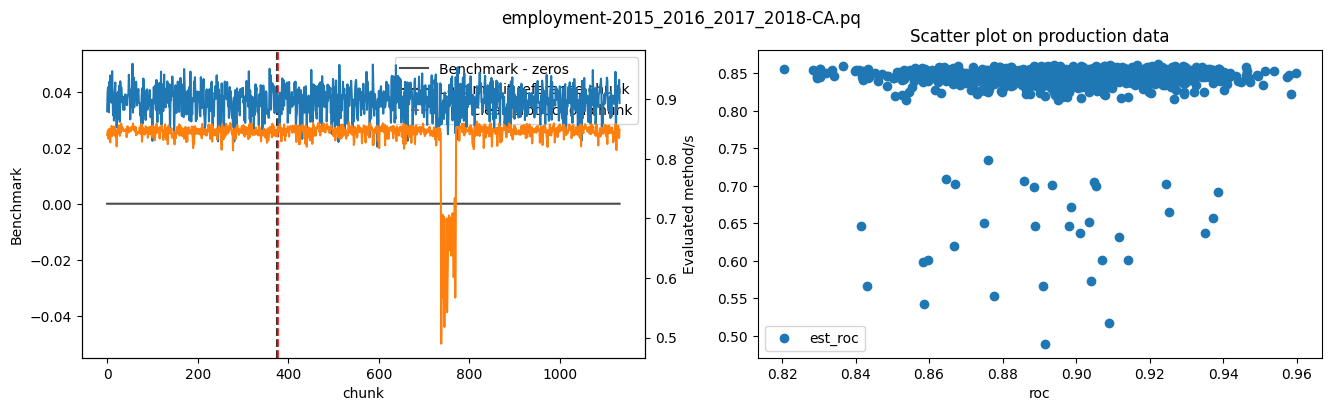

PROGRESS: 0.9047619047619048
RT LGBMClassifier_

Evaluating on: datasets\employment-2015_2016_2017_2018-CA.pq
Chunk size: 500, all chunks: 1132, reference_chunks: 376, transition chunks: 1, production_chunks (includes transition) :756
plotting6077738516755


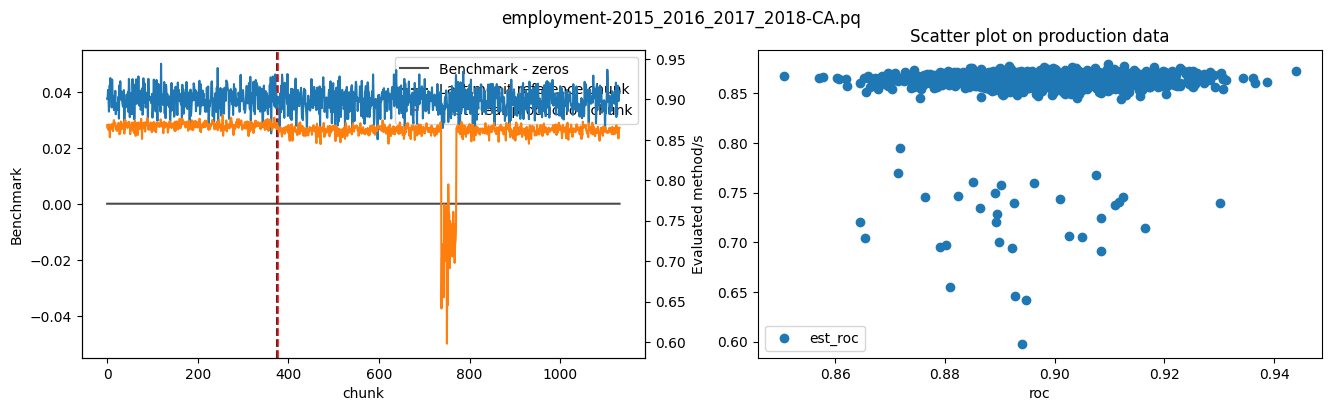

PROGRESS: 0.9285714285714285
RT LGBMClassifier_

Evaluating on: datasets\employment-2015_2016_2017_2018-CA.pq
Chunk size: 1000, all chunks: 1132, reference_chunks: 376, transition chunks: 1, production_chunks (includes transition) :756
plotting6077738516755


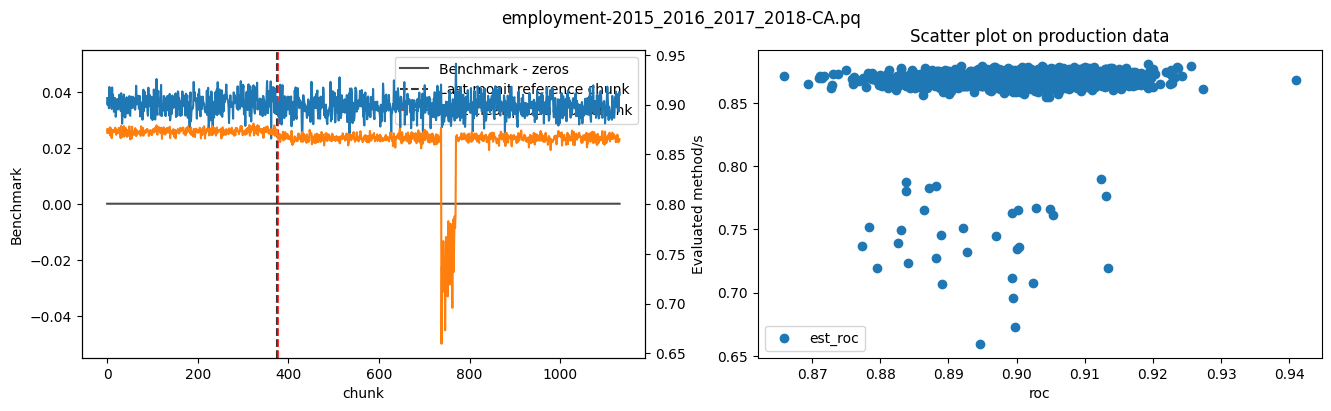

PROGRESS: 0.9523809523809524
RT LGBMClassifier_

Evaluating on: datasets\employment-2015_2016_2017_2018-CA.pq
Chunk size: 2000, all chunks: 1131, reference_chunks: 375, transition chunks: 2, production_chunks (includes transition) :756
plotting8267020336655


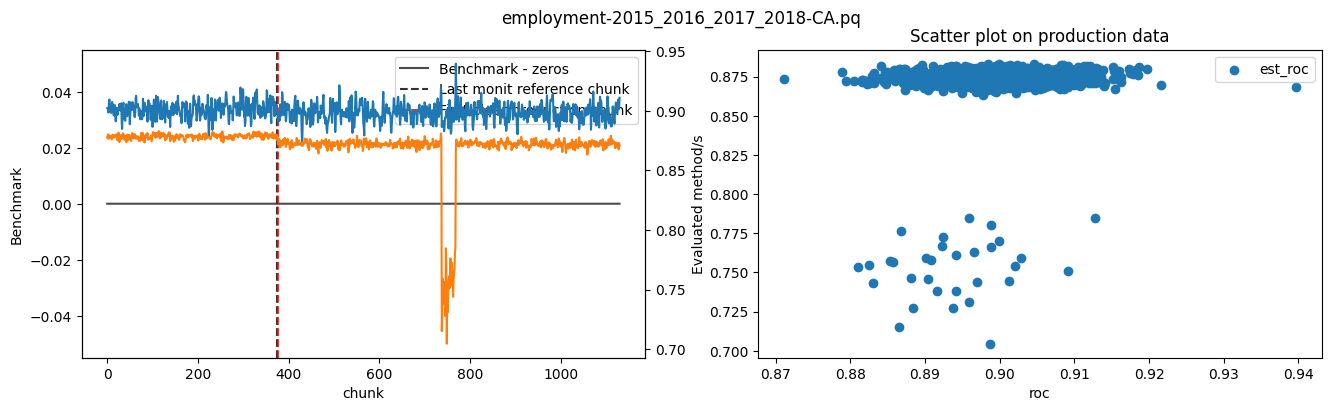

PROGRESS: 0.9761904761904762
RT LGBMClassifier_

Evaluating on: datasets\employment-2015_2016_2017_2018-CA.pq
Chunk size: 5000, all chunks: 1128, reference_chunks: 372, transition chunks: 5, production_chunks (includes transition) :756
plotting4751773059555


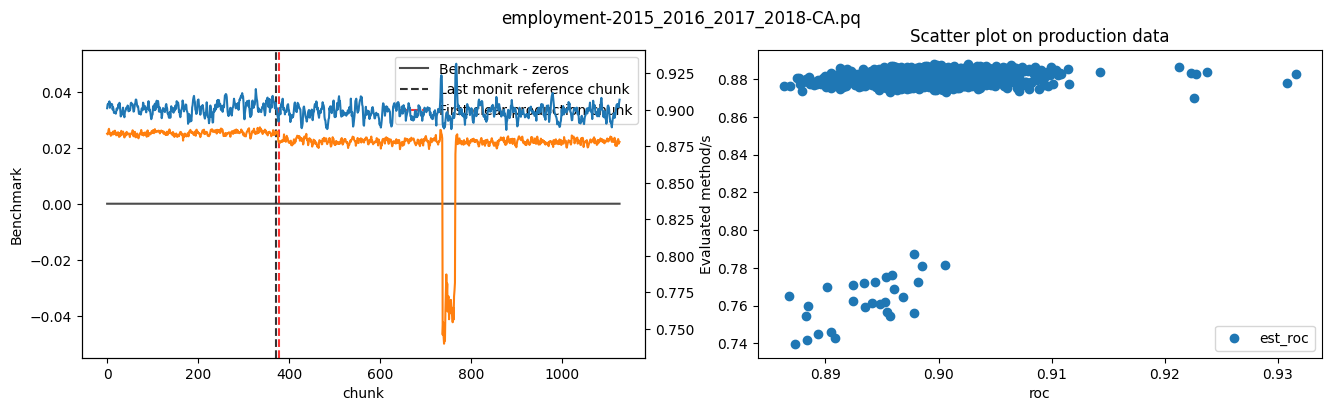

CPU times: total: 3d 7h 43min 43s
Wall time: 9h 30min 18s


In [15]:
%%time
results = []
experiments_done = []
experiments_to_rerun = []

for i, experiment in enumerate(experiments[:]):
    
    method = experiment['method']
    monitored_model = experiment['monitored_model']
    
    calculation_steps_dic = {
    "TEST_SET": ef_steps.Step(description='Calculate TEST SET performance prediction on chunks', 
                     func=calculate_TEST_SET_performance_on_chunk, args=(monitored_model,)),
    "PAPE": ef_steps.Step(description='Calculate PAPE prediction on chunks', 
                     func=calculate_PAPE_on_chunk, args=(monitored_model,)),
    'ATC':  ef_steps.Step(description='Calculate ATC', 
                     func=calculate_ATC_on_chunk, args=(monitored_model, )),
    'DOC': ef_steps.Step(description='Calculate DOC', 
                     func=calculate_DOC_on_chunk, args=(monitored_model, 2000, 'random')),
    'IW': ef_steps.Step(description='Calculate IW', 
                      func=calculate_IW_on_chunk, args=(monitored_model,)),
    'RT': ef_steps.Step(description='Calculate RT', 
                        func=calculate_RT_on_chunk, args=(monitored_model,)),
    'CBPE': ef_steps.Step(description='Calculate CBPE prediction on chunks', 
                     func=calculate_CBPE_on_chunk, args=(monitored_model,))     
    }
    
    calculation_step = calculation_steps_dic[method]
    
    print("experiment {} out of {}".format(i, len(experiments)))
    for j, dataset in enumerate(datasets):
        print("PROGRESS: " + str((i*len(datasets)+j)/len(experiments)/len(datasets)))

        print(method, monitored_model)
        
        pipeline = EvaluationPipeline(steps=[

            ef_steps.SplitDataStep(), #split raw to train test (reference/Production)
            ef_steps.CombineProcessedReferenceProductionWithRawStep(), # combine after processing
            ef_steps.SplitIntoChunksStep(), # split to chunks
            ef_steps.Step(description='Calculate targets', 
                     func=calculate_targets, args=(monitored_model, )), # custom step
            calculation_step,
            ef_steps.ComparePlotSingle(
                compare_data_entries_names=['zeros', 'roc', 'est_roc',],
                plot=True,
                scatter_entries= ['roc', 'est_roc'],
                show_legend=True, save_fig=False, fig_location='evaluation_plots_roc', fig_name=method + '_roc'),

            ])

        res, dat = run_on_many_datasets(datasets=[dataset], pipeline=pipeline, log_metrics=False,)
        
        
        if "traceback" in dat[0].keys():
            experiments_to_rerun.append((experiment, dataset.data_path, dat[0]['traceback']))
        else:
            df_results = save_results_to_df(dat, method, monitored_model)
            results.append(df_results)
            
        experiments_done.append(experiment)


In [16]:
df = pd.concat(results).reset_index(drop=True)

In [18]:
df

method                               dataset  monitored_model  accuracy  \
0       PAPE  employment-2015_2016_2017_2018-CA.pq  LGBMClassifier_    0.8300   
1       PAPE  employment-2015_2016_2017_2018-CA.pq  LGBMClassifier_    0.8800   
2       PAPE  employment-2015_2016_2017_2018-CA.pq  LGBMClassifier_    0.8200   
3       PAPE  employment-2015_2016_2017_2018-CA.pq  LGBMClassifier_    0.8500   
4       PAPE  employment-2015_2016_2017_2018-CA.pq  LGBMClassifier_    0.8600   
...      ...                                   ...              ...       ...   
47518     RT  employment-2015_2016_2017_2018-CA.pq  LGBMClassifier_    0.8296   
47519     RT  employment-2015_2016_2017_2018-CA.pq  LGBMClassifier_    0.8266   
47520     RT  employment-2015_2016_2017_2018-CA.pq  LGBMClassifier_    0.8216   
47521     RT  employment-2015_2016_2017_2018-CA.pq  LGBMClassifier_    0.8220   
47522     RT  employment-2015_2016_2017_2018-CA.pq  LGBMClassifier_    0.8256   

       est_accuracy   roc_auc  est_roc_auc        f1    est_f1      period  \
0          0.840688  0.877551     0.901566  0.838095  0.844417   reference   
1          0.886251  0.938611     0.944643  0.857143  0.863683   reference   
2          0.831135  0.887473     0.901846  0.763158  0.787560   reference   
3          0.819742  0.923232     0.901541  0.827586  0.787752   reference   
4          0.831525  0.929487     0.914562  0.857143  0.826396   reference   
...             ...       ...          ...       ...       ...         ...   
47518      0.805236  0.904058     0.878910  0.829464  0.795318  production   
47519      0.805133  0.903187     0.880031  0.828147  0.795727  production   
47520      0.805034  0.901913     0.876799  0.821099  0.795676  production   
47521      0.805162  0.904863     0.877585  0.820129  0.796055  production   
47522      0.804962  0.906973     0.878059  0.824123  0.795888  production   

       chunksize  step  
0            100  1000  
1            100  1000  
2            100  1000  
3            100  1000  
4            100  1000  
...          ...   ...  
47518       5000  1000  
47519       5000  1000  
47520       5000  1000  
47521       5000  1000  
47522       5000  1000  

[47523 rows x 12 columns]

In [19]:
results_files_folder

'sample_size_experiment_results'

In [21]:
df.to_parquet(os.path.join(results_files_folder, 'experiment_chunk_size_effect.pq'))